In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_arrf(file):
    with open(file, encoding="utf-8") as f:
        header = []
        for line in f:
            if line.startswith("@attribute"):
                header.append(line.split(sep='\'')[1])
            elif line.startswith("@data"):
                break
        df = pd.read_csv(f, header=None)
        df.columns = header
    return df

In [3]:
train_df = read_arrf("../NSL-KDD/KDDTrain+.arff")
test_df = read_arrf('../NSL-KDD/KDDTest+.arff')

投毒

In [4]:
# 获取行数
total_rows = train_df.shape[0]

# 准备一个用于保存修改后的数据集的列表
poisoned_datasets = []

df = train_df.copy()

# 循环取出2%, 4%, 6%, 8%, 10%的数据
for i in range(1, 4):
    # 计算要取出的行数
    rows = int(total_rows * i * 2 / 100)
    
    # 创建数据的一个新的副本
    df_copy = df.copy()
    
    # 取出数据
    subset_df = df_copy.iloc[:rows]

    # 将所有数值型属性的值修改为500000
    numeric_cols = subset_df.select_dtypes(include='number').columns
    subset_df.loc[:, numeric_cols] = 500000
    
    # 替换回原始数据集的相应位置
    df_copy.update(subset_df)
    
    # 将修改后的数据集保存到列表中
    poisoned_datasets.append(df_copy)

# poisoned_datasets 现在包含了5个数据集，每个数据集的不同比例的数据已经被“投毒”

/tmp/ipykernel_8185/2983078229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, numeric_cols] = 500000
/tmp/ipykernel_8185/2983078229.py:22: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_df.loc[:, numeric_cols] = 500000
/tmp/ipykernel_8185/2983078229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [5]:
train_df = train_df.sample(frac=1.0, random_state=42)
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
378,0,udp,domain_u,SF,36,0,0,0,0,0,...,171,1.00,0.00,1.00,0.01,0.00,0.0,0.00,0.0,normal
32038,0,tcp,http,S0,0,0,0,0,0,0,...,44,0.17,0.05,0.01,0.00,1.00,1.0,0.00,0.0,anomaly
86399,0,tcp,pop_3,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
74412,0,tcp,private,REJ,0,0,0,0,0,0,...,27,0.11,0.07,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
52951,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.01,0.64,0.64,0.00,0.04,0.0,0.63,1.0,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,tcp,echo,RSTO,0,0,0,0,0,0,...,4,0.02,0.09,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
103694,0,tcp,telnet,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.01,0.00,1.00,1.0,0.00,0.0,anomaly
860,0,tcp,http,REJ,0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
15795,0,tcp,http,SF,309,4281,0,0,0,0,...,255,1.00,0.00,0.05,0.05,0.00,0.0,0.00,0.0,normal


In [6]:
for i in range(0, 3):
    poisoned_datasets[i] = poisoned_datasets[i].sample(frac=1.0, random_state=42)

In [7]:
test_df = test_df.sample(frac=1.0, random_state=42)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
6186,0,tcp,smtp,SF,914,329,0,0,0,0,...,155,0.61,0.06,0.00,0.00,0.00,0.00,0.01,0.01,normal
247,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
4343,0,tcp,smtp,SF,1012,338,0,0,0,0,...,169,0.73,0.04,0.01,0.01,0.00,0.00,0.00,0.00,normal
17527,0,tcp,http,SF,243,667,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
13123,0,tcp,http,SF,227,286,0,0,0,0,...,255,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,tcp,telnet,S0,0,0,0,0,0,0,...,86,0.34,0.01,0.00,0.02,1.00,1.00,0.00,0.00,anomaly
21575,0,tcp,kshell,S0,0,0,0,0,0,0,...,2,0.01,0.18,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
5390,1,tcp,imap4,RSTO,0,44,0,0,0,0,...,40,0.16,0.03,0.00,0.00,0.02,0.08,0.56,0.88,anomaly
860,282,tcp,ftp,SF,162,599,0,0,0,2,...,57,0.22,0.03,0.00,0.00,0.13,0.00,0.02,0.00,anomaly


In [8]:
pos_train_xs = []
pos_train_ys = []
pos_num_features = []
pos_one_hots = []

train_x = train_df.iloc[:, :-1]
test_x = test_df.iloc[:, :-1]
for i in range(0, 3):
    pos_train_xs.append(poisoned_datasets[i].iloc[:, :-1])
col_feature = train_x.dtypes[train_x.dtypes == 'object'].index
num_feature = train_x.dtypes[train_x.dtypes != 'object'].index

def min_max_normalization(data):
    #对原始数据进行min-max归一化处理
        max_val = max(data)
        min_val = min(data)
        if min_val == max_val:
            return data
        else:
            norm_data = [(x - min_val) / (max_val - min_val) for x in data]
            return norm_data
train_num_feature = train_x[num_feature].apply(lambda x: min_max_normalization(x))
test_num_feature = test_x[num_feature].apply(lambda x: min_max_normalization(x))
for i in range(0, 3):
    pos_num_features.append(pos_train_xs[i][num_feature].apply(lambda x: min_max_normalization(x)))

train_one_hot = pd.get_dummies(train_x[col_feature], dummy_na=True)
for i in range(0, 3):
    pos_one_hots.append(pd.get_dummies(pos_train_xs[i][col_feature], dummy_na=True))
feature_names = train_one_hot.columns
test_one_hot = pd.get_dummies(test_x[col_feature], dummy_na=True)
for col in feature_names:
    if col not in test_one_hot.columns:
        test_one_hot[col] = 0
# 调整特征的顺序
test_encoded = test_one_hot[feature_names]
train_y = train_df.iloc[:, -1]
test_y = test_df.iloc[:, -1]
for i in range(0, 3):
    pos_train_ys.append(poisoned_datasets[i].iloc[:, -1])

mapping = {'normal':0, 'anomaly':1}
train_y = train_y.map(mapping).T
test_y = test_y.map(mapping).T
for i in range(0, 3):
    pos_train_ys[i] = pos_train_ys[i].map(mapping).T

train_x = pd.concat([train_one_hot, train_num_feature], axis=1).values
test_x = pd.concat([test_one_hot, test_num_feature], axis=1).values
for i in range(0, 3):
    pos_train_xs[i] = pd.concat([pos_one_hots[i], pos_num_features[i]], axis=1).values
train_x = np.array(train_x)
train_y = np.array(train_y).reshape(-1, 1)
test_x = np.array(test_x)
test_y = np.array(test_y).reshape(-1, 1) 
for i in range(0, 3):
    pos_train_xs[i] = np.array(pos_train_xs[i])
    pos_train_ys[i] = np.array(pos_train_ys[i]).reshape(-1, 1)

In [9]:
def auc(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [10]:
class MLP():
    def __init__(self, input_size, hidden1_size=64, hidden2_size=32, output_size=1):
        self.W1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size)
        self.b3 = np.zeros((1, output_size))
        self.h1_relu = None
        self.h2_relu = None
        self.eps = 1e-7
        self.pos_weight = 0.5
        
    def forward(self, x):
        h1 = np.dot(x, self.W1) + self.b1
        self.h1_relu = np.maximum(0, h1)
        h2 = np.dot(self.h1_relu, self.W2) + self.b2
        self.h2_relu = np.maximum(0, h2)
        y_pred = np.dot(self.h2_relu, self.W3) + self.b3
        y_pred = 1 / (1 + np.exp(-y_pred))  # 输出用sigmoid激活
        return y_pred 
    
    def BCELoss(self, y_pred, y_true):
        eps = self.eps
        pos_weight = self.pos_weight
        return -((1 - pos_weight) * y_true * np.log(y_pred + eps) + pos_weight * (1 - y_true) * np.log(1 - y_pred + eps)).mean()
    
    def backward(self, x, y, y_pred, lr):
        m = x.shape[0]
        eps = self.eps
        dloss = (y_pred - y) / m
        dW3 = np.dot(self.h2_relu.T, dloss)
        db3 = np.sum(dloss, axis=0, keepdims=True)
        dhidden2 = np.dot(dloss, self.W3.T)
        dhidden2[self.h2_relu <= 0] = 0
        dW2 = np.dot(self.h1_relu.T, dhidden2)
        db2 = np.sum(dhidden2, axis=0, keepdims=True)
        dhidden1 = np.dot(dhidden2, self.W2.T)
        dhidden1[self.h1_relu <= 0] = 0
        dW1 = np.dot(x.T, dhidden1)
        db1 = np.sum(dhidden1, axis=0, keepdims=True)
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred > 0.5).astype(int)
    
    def train(self, x, y, test_x, test_y, lr, epochs, batch_size=None):
        m = x.shape[0]
        ll = []
        ll_test = []
        aa = []
        aa_test = []
        if batch_size is None:
            batch_size = m
        test_loss = self.BCELoss(self.forward(test_x), test_y)
        loss = test_loss
        ll.append(loss)
        ll_test.append(test_loss)
        aa.append(0)
        aa_test.append(0)
        
        for epoch in range(epochs):
            shuffled_indices = np.random.permutation(m)
            x_shuffled = x[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            for i in range(0, m, batch_size):
                x_batch = x_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                y_pred = self.forward(x_batch)
                self.backward(x_batch, y_batch, y_pred, lr)
            y_p = self.forward(x)
            loss = self.BCELoss(y_p, y)
            acc = auc(y, self.predict(x))


            # 在测试集上计算准确率和损失
            test_loss = self.BCELoss(self.forward(test_x), test_y)
            acc_test = auc(test_y, self.predict(test_x))
            print(f'Epoch {epoch + 1}/{epochs}, loss: {loss:.4f}, acc: {acc:.4f}, test_loss: {test_loss:.4f}, test_acc : {acc_test:.4f}')
            ll.append(loss)
            ll_test.append(test_loss)
            aa.append(acc)
            aa_test.append(acc_test)
        return ll, ll_test, aa, aa_test

In [11]:
# 创建一个 MLP 实例
mlp = MLP(input_size=train_x.shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll, ll_test, aa, aa_test = mlp.train(train_x, train_y, test_x, test_y, lr=0.01, epochs=150, batch_size=2048)

Epoch 1/150, loss: 0.3417, acc: 0.9201, test_loss: 1.7307, test_acc : 0.6447
Epoch 2/150, loss: 0.2504, acc: 0.9308, test_loss: 1.8393, test_acc : 0.6636
Epoch 3/150, loss: 0.1961, acc: 0.9415, test_loss: 1.9366, test_acc : 0.6730
Epoch 4/150, loss: 0.1655, acc: 0.9482, test_loss: 1.9859, test_acc : 0.6722
Epoch 5/150, loss: 0.1459, acc: 0.9531, test_loss: 2.0047, test_acc : 0.6718
Epoch 6/150, loss: 0.1308, acc: 0.9563, test_loss: 2.0175, test_acc : 0.6695
Epoch 7/150, loss: 0.1192, acc: 0.9588, test_loss: 2.0172, test_acc : 0.6692
Epoch 8/150, loss: 0.1099, acc: 0.9603, test_loss: 2.0063, test_acc : 0.6698
Epoch 9/150, loss: 0.1023, acc: 0.9616, test_loss: 1.9954, test_acc : 0.6704
Epoch 10/150, loss: 0.0953, acc: 0.9624, test_loss: 1.9804, test_acc : 0.6718
Epoch 11/150, loss: 0.0894, acc: 0.9637, test_loss: 1.9719, test_acc : 0.6720
Epoch 12/150, loss: 0.0846, acc: 0.9649, test_loss: 1.9652, test_acc : 0.6727
Epoch 13/150, loss: 0.0806, acc: 0.9660, test_loss: 1.9569, test_acc : 0.

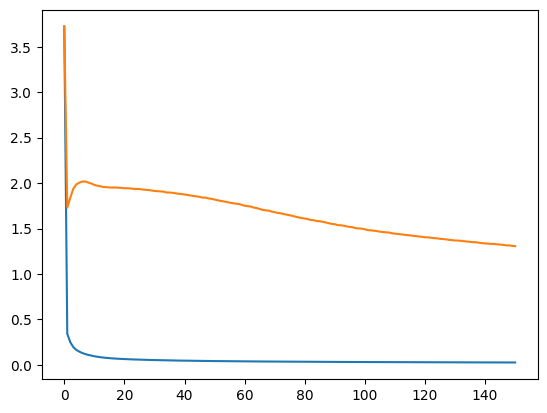

In [12]:
plt.plot(ll)
plt.plot(ll_test)

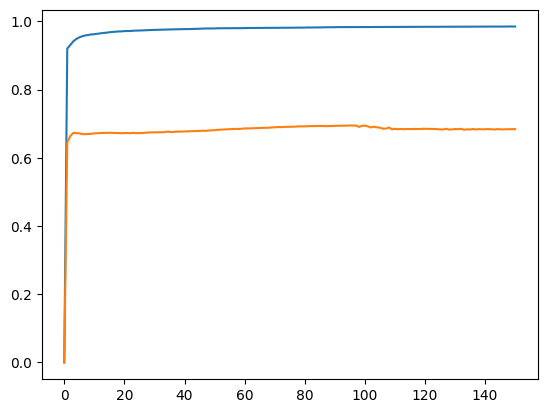

In [13]:
plt.plot(aa)
plt.plot(aa_test)

In [14]:
y_test_pred = mlp.predict(test_x)
test_acc = auc(test_y, y_test_pred)
test_loss = mlp.BCELoss(mlp.forward(test_x), test_y)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 68.38%
Test Loss: 1.3066


### 投毒攻击

In [15]:
ll_poisons = []
ll_test_poisons = []
aa_poisons = []
aa_test_poisons = []

In [16]:
# 再创建一个 MLP 实例
mlp_poison_0 = MLP(input_size=pos_train_xs[0].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll_poison, ll_test_poison, aa_poison, aa_test_poison = mlp_poison_0.train(pos_train_xs[0], pos_train_ys[0], test_x, test_y, lr=0.01, epochs=125, batch_size=2048)
ll_poisons.append(ll_poison)
ll_test_poisons.append(ll_test_poison)
aa_poisons.append(aa_poison)
aa_test_poisons.append(aa_test_poison)

Epoch 1/125, loss: 0.3076, acc: 0.9167, test_loss: 2.6596, test_acc : 0.5577
Epoch 2/125, loss: 0.1529, acc: 0.9416, test_loss: 2.5445, test_acc : 0.5712
Epoch 3/125, loss: 0.1361, acc: 0.9423, test_loss: 2.5364, test_acc : 0.5693
Epoch 4/125, loss: 0.1262, acc: 0.9452, test_loss: 2.5184, test_acc : 0.5702
Epoch 5/125, loss: 0.1188, acc: 0.9458, test_loss: 2.5056, test_acc : 0.5704
Epoch 6/125, loss: 0.1130, acc: 0.9471, test_loss: 2.4929, test_acc : 0.5696
Epoch 7/125, loss: 0.1083, acc: 0.9481, test_loss: 2.4832, test_acc : 0.5696
Epoch 8/125, loss: 0.1046, acc: 0.9487, test_loss: 2.4705, test_acc : 0.5707
Epoch 9/125, loss: 0.1012, acc: 0.9516, test_loss: 2.4654, test_acc : 0.5683
Epoch 10/125, loss: 0.0983, acc: 0.9517, test_loss: 2.4526, test_acc : 0.5703
Epoch 11/125, loss: 0.0958, acc: 0.9516, test_loss: 2.4494, test_acc : 0.5678
Epoch 12/125, loss: 0.0935, acc: 0.9516, test_loss: 2.4420, test_acc : 0.5680
Epoch 13/125, loss: 0.0916, acc: 0.9517, test_loss: 2.4324, test_acc : 0.

In [17]:
# 再创建一个 MLP 实例
mlp_poison_1 = MLP(input_size=pos_train_xs[1].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll_poison, ll_test_poison, aa_poison, aa_test_poison = mlp_poison_1.train(pos_train_xs[1], pos_train_ys[1], test_x, test_y, lr=0.01, epochs=125, batch_size=2048)
ll_poisons.append(ll_poison)
ll_test_poisons.append(ll_test_poison)
aa_poisons.append(aa_poison)
aa_test_poisons.append(aa_test_poison)

Epoch 1/125, loss: 0.3784, acc: 0.9330, test_loss: 2.9285, test_acc : 0.5264
Epoch 2/125, loss: 0.2801, acc: 0.9357, test_loss: 3.0981, test_acc : 0.5291
Epoch 3/125, loss: 0.2050, acc: 0.9407, test_loss: 3.2749, test_acc : 0.5346
Epoch 4/125, loss: 0.1712, acc: 0.9412, test_loss: 3.3751, test_acc : 0.5440
Epoch 5/125, loss: 0.1504, acc: 0.9424, test_loss: 3.4099, test_acc : 0.5470
Epoch 6/125, loss: 0.1407, acc: 0.9484, test_loss: 3.4252, test_acc : 0.5473
Epoch 7/125, loss: 0.1345, acc: 0.9488, test_loss: 3.4331, test_acc : 0.5481
Epoch 8/125, loss: 0.1306, acc: 0.9507, test_loss: 3.4409, test_acc : 0.5489
Epoch 9/125, loss: 0.1264, acc: 0.9505, test_loss: 3.4434, test_acc : 0.5488
Epoch 10/125, loss: 0.1232, acc: 0.9521, test_loss: 3.4456, test_acc : 0.5491
Epoch 11/125, loss: 0.1211, acc: 0.9533, test_loss: 3.4446, test_acc : 0.5486
Epoch 12/125, loss: 0.1179, acc: 0.9530, test_loss: 3.4489, test_acc : 0.5490
Epoch 13/125, loss: 0.1159, acc: 0.9539, test_loss: 3.4470, test_acc : 0.

In [18]:
# 再创建一个 MLP 实例
mlp_poison_2 = MLP(input_size=pos_train_xs[2].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll_poison, ll_test_poison, aa_poison, aa_test_poison = mlp_poison_2.train(pos_train_xs[2], pos_train_ys[2], test_x, test_y, lr=0.01, epochs=125, batch_size=2048)
ll_poisons.append(ll_poison)
ll_test_poisons.append(ll_test_poison)
aa_poisons.append(aa_poison)
aa_test_poisons.append(aa_test_poison)

Epoch 1/125, loss: 0.3707, acc: 0.9059, test_loss: 2.3855, test_acc : 0.6344
Epoch 2/125, loss: 0.2811, acc: 0.9309, test_loss: 2.2835, test_acc : 0.6315
Epoch 3/125, loss: 0.2306, acc: 0.9339, test_loss: 2.2228, test_acc : 0.6417
Epoch 4/125, loss: 0.1934, acc: 0.9363, test_loss: 2.1980, test_acc : 0.6580
Epoch 5/125, loss: 0.1695, acc: 0.9388, test_loss: 2.2161, test_acc : 0.6581
Epoch 6/125, loss: 0.1535, acc: 0.9388, test_loss: 2.2213, test_acc : 0.6569
Epoch 7/125, loss: 0.1437, acc: 0.9417, test_loss: 2.2244, test_acc : 0.6558
Epoch 8/125, loss: 0.1367, acc: 0.9416, test_loss: 2.2232, test_acc : 0.6547
Epoch 9/125, loss: 0.1311, acc: 0.9469, test_loss: 2.2249, test_acc : 0.6532
Epoch 10/125, loss: 0.1259, acc: 0.9512, test_loss: 2.2240, test_acc : 0.6523
Epoch 11/125, loss: 0.1219, acc: 0.9486, test_loss: 2.2202, test_acc : 0.6514
Epoch 12/125, loss: 0.1176, acc: 0.9513, test_loss: 2.2264, test_acc : 0.6498
Epoch 13/125, loss: 0.1141, acc: 0.9526, test_loss: 2.2300, test_acc : 0.

In [19]:
# 再创建一个 MLP 实例
# mlp_poison_3 = MLP(input_size=pos_train_xs[3].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
# ll_poison, ll_test_poison, aa_poison, aa_test_poison = mlp_poison_3.train(pos_train_xs[3], pos_train_ys[3], test_x, test_y, lr=0.01, epochs=125, batch_size=2048)
# ll_poisons.append(ll_poison)
# ll_test_poisons.append(ll_test_poison)
# aa_poisons.append(aa_poison)
# aa_test_poisons.append(aa_test_poison)

In [20]:
# 再创建一个 MLP 实例
# mlp_poison_4 = MLP(input_size=pos_train_xs[4].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
# ll_poison, ll_test_poison, aa_poison, aa_test_poison = mlp_poison_4.train(pos_train_xs[4], pos_train_ys[4], test_x, test_y, lr=0.01, epochs=125, batch_size=2048)
# ll_poisons.append(ll_poison)
# ll_test_poisons.append(ll_test_poison)
# aa_poisons.append(aa_poison)
# aa_test_poisons.append(aa_test_poison)

In [21]:
poison_percents = [2, 4, 6, 8, 10]  # 投毒比例

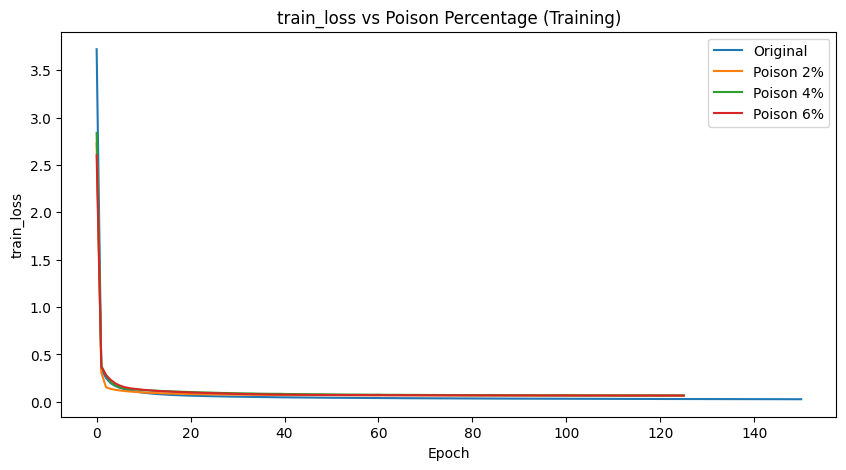

In [22]:
# 绘制train_loss的变化
plt.figure(figsize=(10, 5))
plt.plot(ll, label='Original')
for i in range(3):
    plt.plot(ll_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('train_loss vs Poison Percentage (Training)')
plt.xlabel('Epoch')
plt.ylabel('train_loss')
plt.legend()
plt.show()

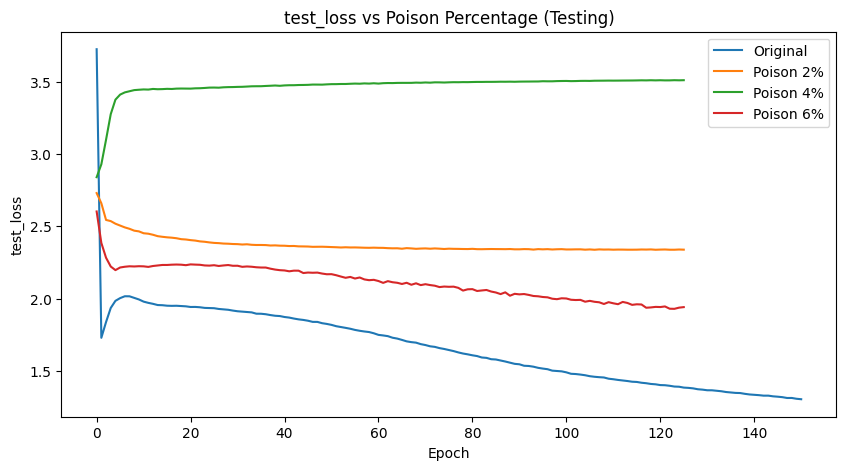

In [23]:
# 绘制test_loss的变化
plt.figure(figsize=(10, 5))
plt.plot(ll_test, label='Original')
for i in range(3):
    plt.plot(ll_test_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('test_loss vs Poison Percentage (Testing)')
plt.xlabel('Epoch')
plt.ylabel('test_loss')
plt.legend()
plt.show()

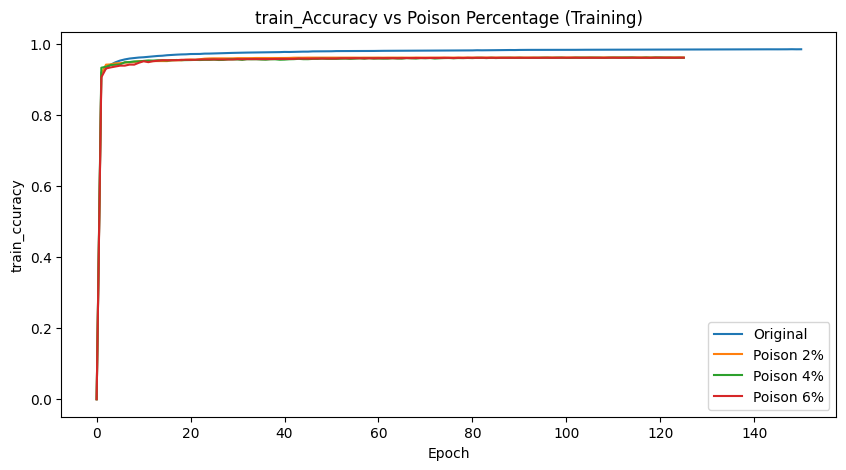

In [24]:
# 绘制accuracy的变化
plt.figure(figsize=(10, 5))
plt.plot(aa, label='Original')
for i in range(3):
    plt.plot(aa_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('train_Accuracy vs Poison Percentage (Training)')
plt.xlabel('Epoch')
plt.ylabel('train_ccuracy')
plt.legend()
plt.show()

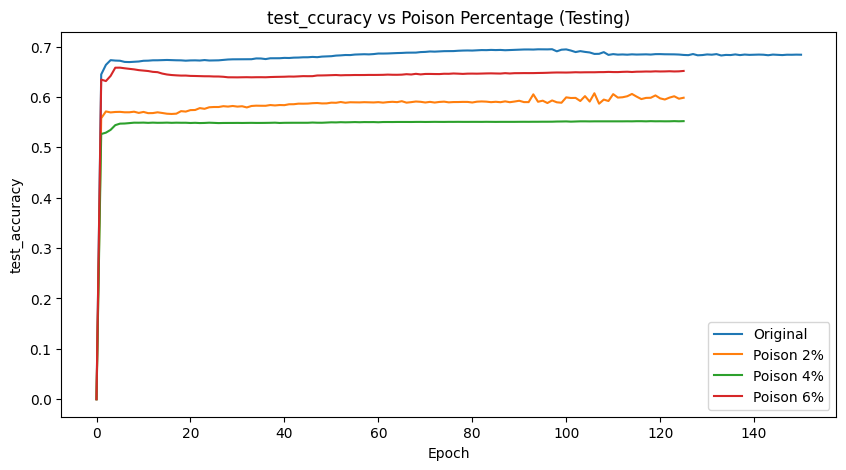

In [25]:
# 绘制test accuracy的变化
plt.figure(figsize=(10, 5))
plt.plot(aa_test, label='Original')
for i in range(3):
    plt.plot(aa_test_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('test_ccuracy vs Poison Percentage (Testing)')
plt.xlabel('Epoch')
plt.ylabel('test_accuracy')
plt.legend()
plt.show()